Electric energy consumption prediction using Machine Learning
Household Electricity consumption
https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set?resource=download

What is the dataset about?
Measurements of electric power consumption in one household with a one-minute 
sampling rate over a period of almost 4 years. Different electrical quantities and 
some sub-metering values are available.  This archive contains 2075259 measurements gathered between  12/2006 and 11/2010 (47 months).
Data Set Characteristics: Multivariate, Time-Series
* globalactivepower is the active energy consumed every minute (in watt hours) in the household by electrical equipment 
not measured in sub-meterings 1, 2 and 3.
* The dataset contains some missing values in the measurements (approx. 1.25% of the rows). 
* All calendar timestamps are present in the dataset but for some timestamps, the measurement 
values are missing: a missing value is found by the looking for null values between two consecutive 
semi-colon attribute delimiters. E.g. April 28, 2007 has null values.
Attribute Information:
1. date: Date in format dd/mm/yyyy (note this is European format)
2. time: time in format hh:mm:ss
3. globalactivepower: household global minute-averaged active power (in kilowatt)
4 .globalreactivepower: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. submetering1: energy sub-metering No. 1 (in watt-hour of active energy). 
It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave 
(hot plates are not electric but gas powered).
8.submetering2: energy sub-metering No. 2 (in watt-hour of active energy). 
It corresponds to the laundry room, containing a washing-machine, a tumble-drier, 
a refrigerator and a light.
9.submetering3: energy sub-metering No. 3 (in watt-hour of active energy). 
It corresponds to an electric water-heater and an air-conditioner.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

df.shape

(2075259, 7)

In [2]:
# Check for null values
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Handle null values, replace with mean values

In [3]:
# Use mean values in place of null values, didn't want to delete too much data
df = df.fillna(df.mean())

In [4]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [5]:
# Look at DataFrame
df.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [6]:
# Ending date
df.tail(1)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [7]:
# Beginning date
df.head(1)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0


In [8]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


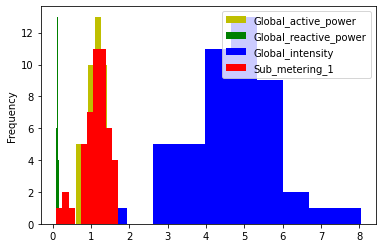

In [9]:
#  Data Visualization
#  Hist Plot Of The Mean Of Different Feature Resampled Over Month 
df.Global_active_power.resample('M').mean().plot(kind='hist', color='y', legend=True )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='g', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='b', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='r', legend=True)
plt.show()

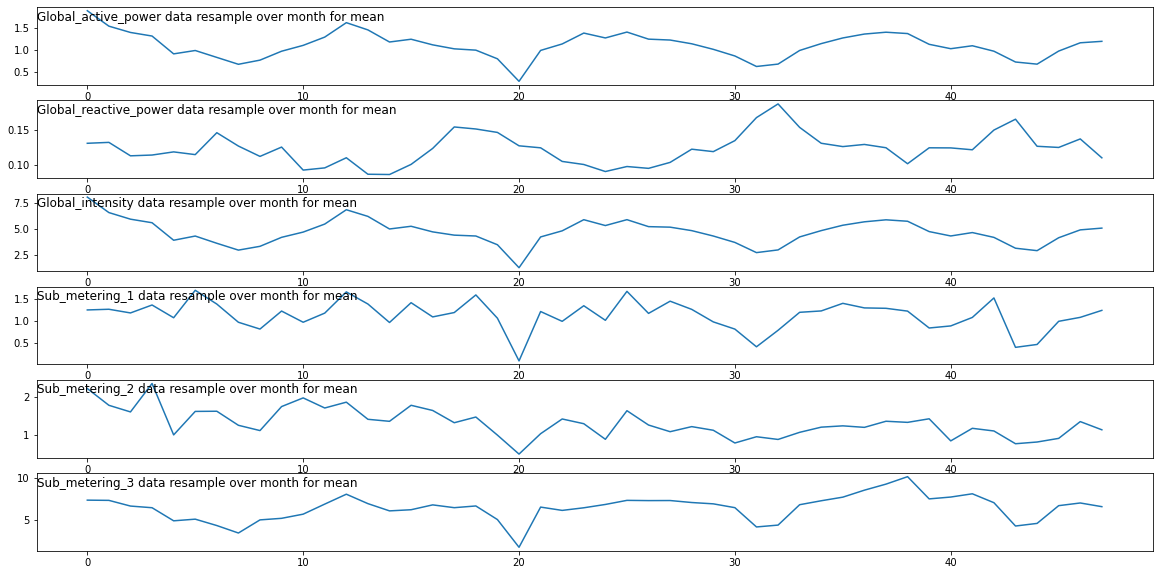

In [10]:
# Data resample for each power variable: global_acitve_power, global_reactive_power, global_intensity,
#                                        sub_metering_1, sub_metering_2, sub_metering_3
import matplotlib.pyplot as plt

i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('M').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

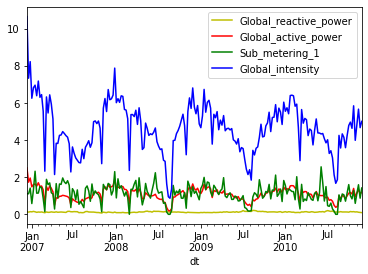

In [11]:
#  Resampling Over Week & Computing Mean
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='g', legend=True)
df.Global_intensity.resample('W').mean().plot(color='b', legend=True)
plt.show()

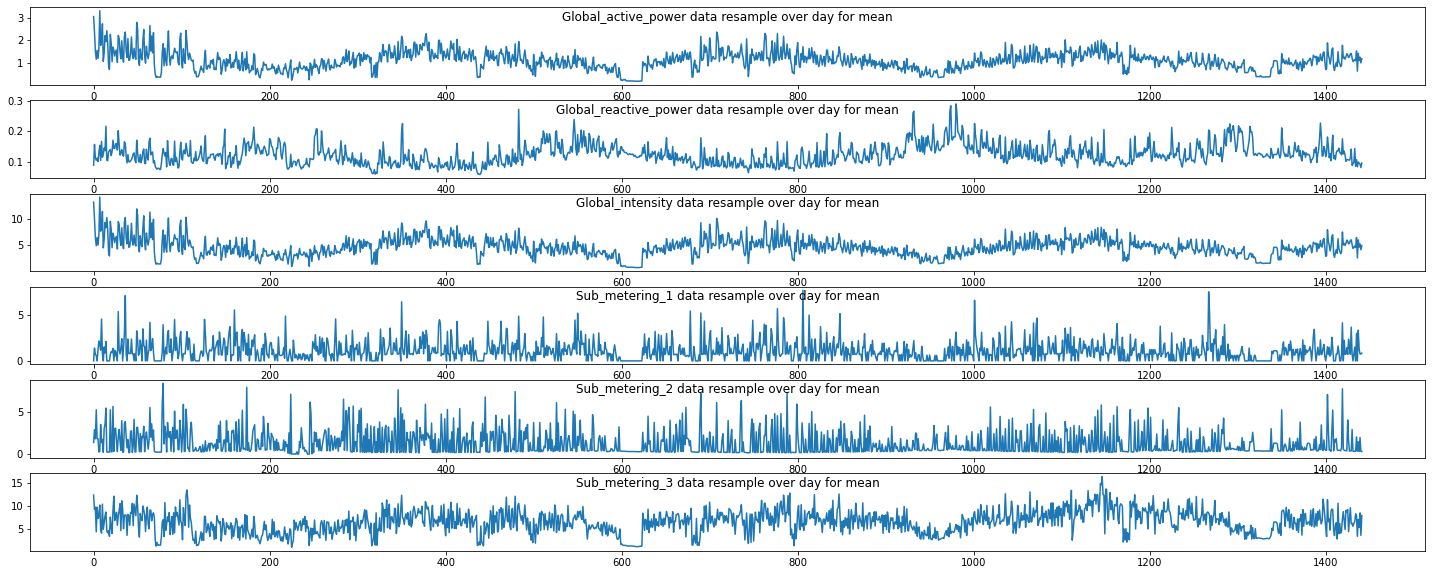

In [12]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(25, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('D').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over day for mean', y=0.75, loc='center')
    i += 1
plt.show()

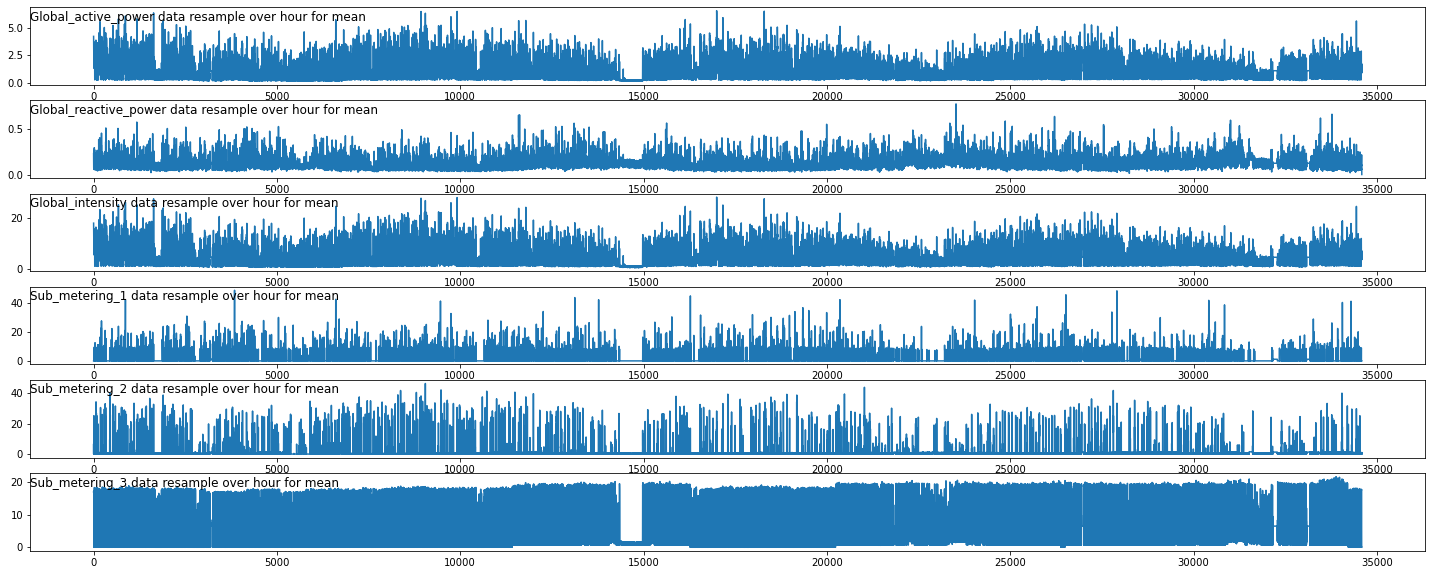

In [13]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(25, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('H').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over hour for mean', y=0.75, loc='left')
    i += 1
plt.show()

In [14]:
daily_info = df.resample('D')
day = daily_info.sum()

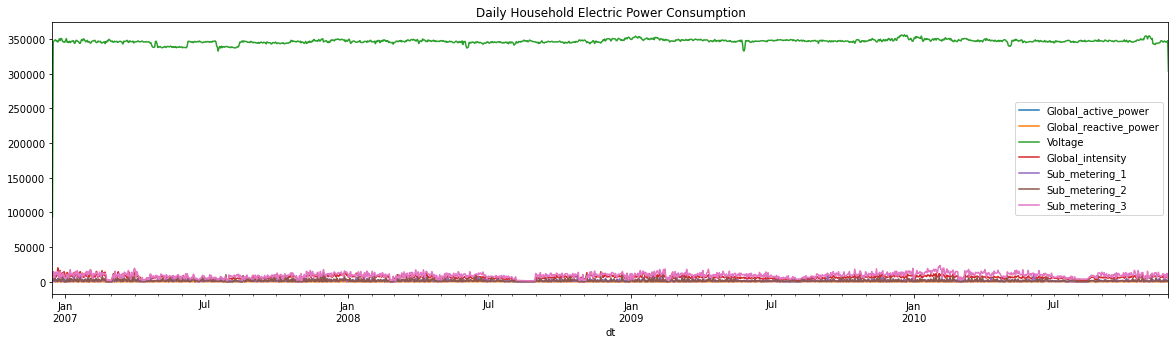

In [15]:
y = day.plot(title='Daily Household Electric Power Consumption', figsize=(20,5))

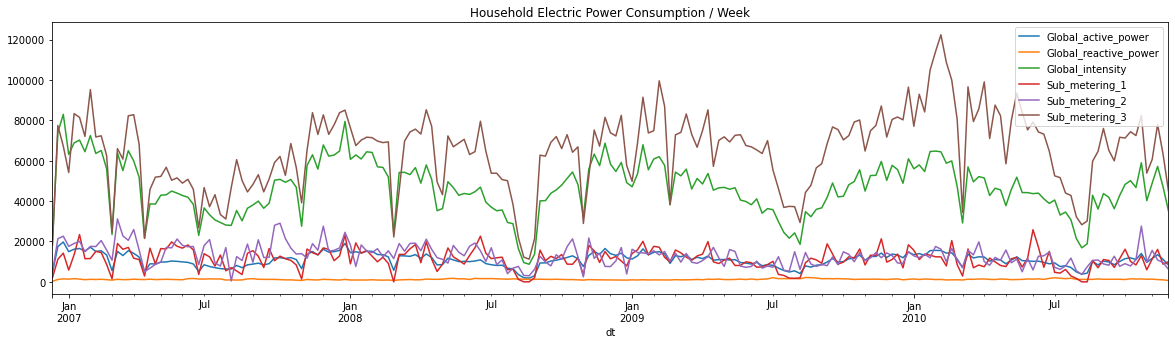

In [16]:
week_info = df.resample('W')
week = week_info.sum()
week_data = week.drop(columns=['Voltage'])
a = week_data.plot(title='Household Electric Power Consumption / Week', figsize=(20,5))

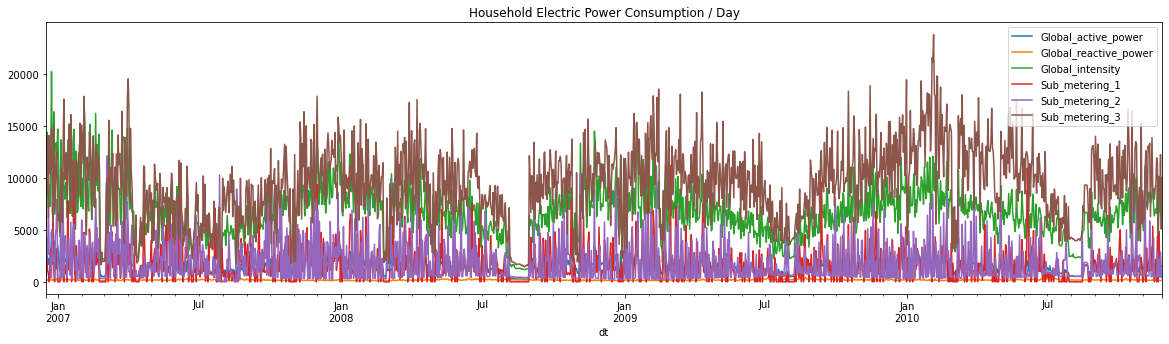

In [17]:
daily_data = day.drop(columns=['Voltage'])
b = daily_data.plot(title='Household Electric Power Consumption / Day', figsize=(20,5))

Observations:
Resampling by month, date or time is very important because it has a great interaction as expected (changing the periodicity of the system).
Therefore, if you process all the original data, the run time will be very expensive, but if you process data with large timescale samples (e.g., monthly), it will affect the predictability of the model.
From observation, we can see it is relatively reasonable to resample the data per hour.

Machine Learning Problem - Predictin Energy Consumption
How to predict values for a time series with 2,075,259 rows.
Data is time series, use multi-layered LSTM machine learning recurrent neural network for large time series.
The dateset will need to be sampled, processed, normalized and split into training and test sets to fun the algorithms.


In [19]:
df = df[['Global_active_power', 'Global_reactive_power', 'Voltage','Global_intensity', 
         'Sub_metering_2', 'Sub_metering_1','Sub_metering_3']]
      # 7 input variables 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [20]:
# Resample
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

Prepare and process data.  Split data into training and testing.  5000 data points for training.

In [21]:
from sklearn.preprocessing import MinMaxScaler

values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
values = reframed.values
n_train_time = 5000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [22]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)



Epoch 1/50
72/72 - 2s - loss: 0.0272 - val_loss: 0.0112 - 2s/epoch - 32ms/step
Epoch 2/50
72/72 - 1s - loss: 0.0147 - val_loss: 0.0104 - 618ms/epoch - 9ms/step
Epoch 3/50
72/72 - 1s - loss: 0.0132 - val_loss: 0.0101 - 620ms/epoch - 9ms/step
Epoch 4/50
72/72 - 1s - loss: 0.0126 - val_loss: 0.0098 - 610ms/epoch - 8ms/step
Epoch 5/50
72/72 - 1s - loss: 0.0121 - val_loss: 0.0097 - 605ms/epoch - 8ms/step
Epoch 6/50
72/72 - 1s - loss: 0.0119 - val_loss: 0.0096 - 606ms/epoch - 8ms/step
Epoch 7/50
72/72 - 1s - loss: 0.0115 - val_loss: 0.0095 - 604ms/epoch - 8ms/step
Epoch 8/50
72/72 - 1s - loss: 0.0114 - val_loss: 0.0094 - 607ms/epoch - 8ms/step
Epoch 9/50
72/72 - 1s - loss: 0.0113 - val_loss: 0.0093 - 605ms/epoch - 8ms/step
Epoch 10/50
72/72 - 1s - loss: 0.0113 - val_loss: 0.0093 - 609ms/epoch - 8ms/step
Epoch 11/50
72/72 - 1s - loss: 0.0111 - val_loss: 0.0093 - 603ms/epoch - 8ms/step
Epoch 12/50
72/72 - 1s - loss: 0.0111 - val_loss: 0.0092 - 608ms/epoch - 8ms/step
Epoch 13/50
72/72 - 1s - lo

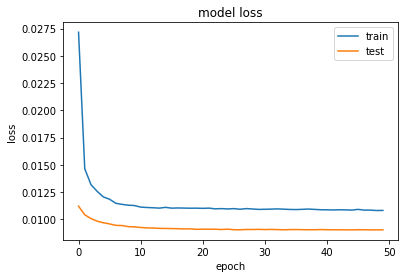

In [23]:
# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [24]:
size = df_resample.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]   



Test RMSE: 0.612


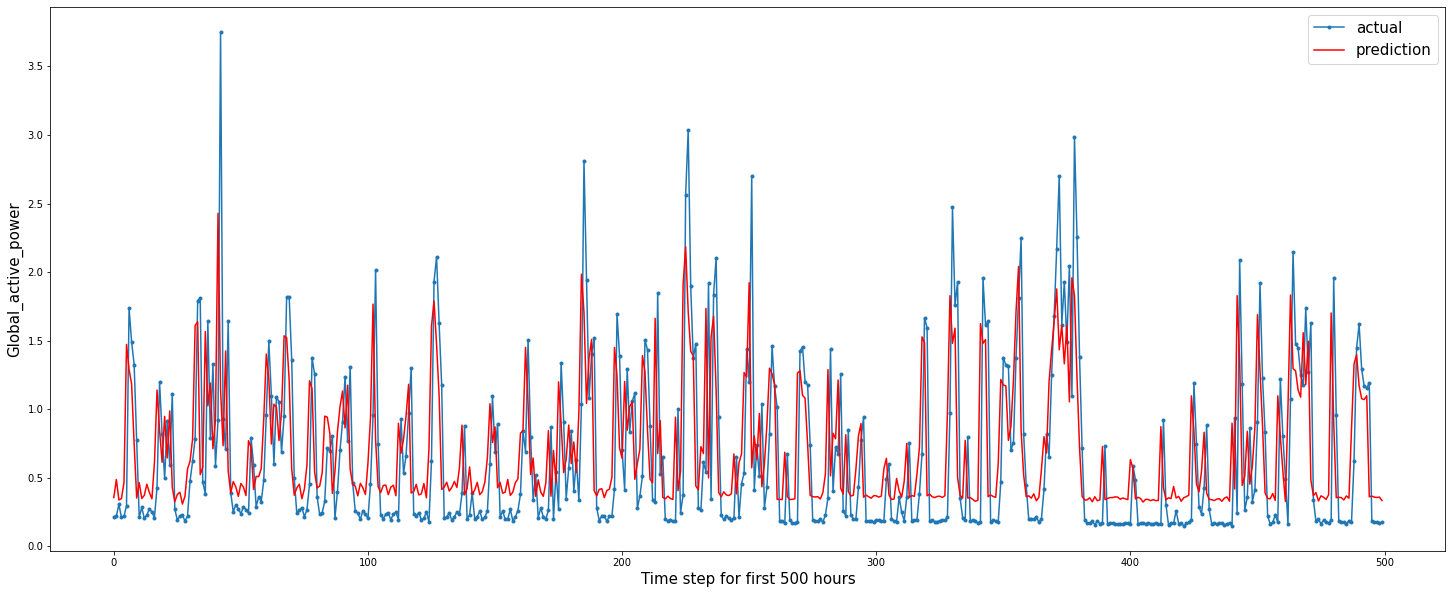

In [25]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

aa=[x for x in range(500)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:500], marker='.', label="actual")
plt.plot(aa, inv_yhat[:500], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()